In [1]:
import truth_request as tr
import truth_analysis as ta
from imp import reload
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse as date_parse
import auth
import requests
import json
import datetime as dt
import numpy as np
import statistics
from matplotlib import pyplot as plt

In [2]:
import orekit
from orekit.pyhelpers import  setup_orekit_curdir

In [3]:
orekit_vm = orekit.initVM()
setup_orekit_curdir("/Users/gkeramidas/Projects/learning/leolabs-config-data-dynamic/")

In [4]:
from ilrs import TruthEphemerisManager
import ilrs

In [80]:
from od_utils.frame_conversion import eci_to_rtn_rotation_matrix

In [5]:
import os

In [83]:
"""Calculates differences between two ephemerides."""
def prov_mean_diff(prov1_eph, prov2_eph, epoch_unix):
    
    timestep = 150
    one_day = 24*60*60/timestep
    
    dX1 = []
    dY1 = []
    dZ1 = []
    dR1 = []
    dI1 = []
    dC1 = []
    dX2 = []
    dY2 = []
    dZ2 = []
    dR2 = []
    dI2 = []
    dC2 = []
    
    curr_time=0
    
    for i in range(int(one_day)):
        mean_position = (prov1_eph.position_at_unix_time(epoch_unix+curr_time) + prov2_eph.position_at_unix_time(epoch_unix+curr_time))/2
        ECI1_diff = mean_position - prov1_eph.position_at_unix_time(epoch_unix+curr_time) 
        ECI2_diff = mean_position - prov2_eph.position_at_unix_time(epoch_unix+curr_time)
        
        
        
        RTN = eci_to_rtn_rotation_matrix(mean_position,prov1_eph.derived_velocity_at_unix_time(epoch_unix+curr_time))
        
        RIC1_diff = np.matmul(RTN,ECI1_diff)
        RIC2_diff = np.matmul(RTN,ECI2_diff)
        
        dX1.append(ECI1_diff[0])
        dY1.append(ECI1_diff[1])
        dZ1.append(ECI1_diff[2])
        
        dR1.append(RIC1_diff[0])
        dI1.append(RIC1_diff[1])
        dC1.append(RIC1_diff[2])
        
        dX2.append(ECI2_diff[0])
        dY2.append(ECI2_diff[1])
        dZ2.append(ECI2_diff[2])
        
        dR2.append(RIC2_diff[0])
        dI2.append(RIC2_diff[1])
        dC2.append(RIC2_diff[2])
        
        curr_time += timestep
    return dX1,dY1,dZ1,dR1,dI1,dC1,dX2,dY2,dZ2,dR2,dI2,dC2               

In [238]:
"""Calculates differences between two ephemerides."""
def single_prov_diff(base_eph, secondary_eph, epoch_unix):
    
    timestep = 150
    one_day = 24*60*60/timestep
    
    dX = []
    dY = []
    dZ = []
    dR = []
    dI = []
    dC = []
    
    curr_time=0
    
    for i in range(int(one_day)):
        ECI_diff = base_eph.position_at_unix_time(epoch_unix+curr_time) - secondary_eph.position_at_unix_time(epoch_unix+curr_time) 
        
        RTN = eci_to_rtn_rotation_matrix(base_eph.position_at_unix_time(epoch_unix+curr_time),base_eph.derived_velocity_at_unix_time(epoch_unix+curr_time))
        
        RIC_diff = np.matmul(RTN,ECI_diff)
        
        dX.append(ECI_diff[0])
        dY.append(ECI_diff[1])
        dZ.append(ECI_diff[2])
        
        dR.append(RIC_diff[0])
        dI.append(RIC_diff[1])
        dC.append(RIC_diff[2])
        
        curr_time += timestep
    return dX,dY,dZ,dR,dI,dC

In [6]:
class tephem:
    def __init__(self, year, month, day, ephem, name, ftype):
        self.year = year
        self.month = month
        self.day = day
        self.ephem = ephem
        self.name = name
        self.ftype = ftype

In [90]:
ephemerides = []
directory = '/Users/gkeramidas/Projects/learning/truth/L2486/'
for file in os.listdir(directory):
    name = str(file)
    date = file.split("_")[-2]
    year = "".join(list(date)[0:2])
    month = "".join(list(date)[2:4])
    day = "".join(list(date)[4:])
    ftype = file.split(".")[-1]
    if ftype == "dgf":
        pass
    else:
        eph = TruthEphemerisManager([directory+file])
        ephemerides.append(tephem(int(year),int(month),int(day),eph,str(name),str(ftype)))
        print(date)
        print(year,month,day)
        print(name)
        print(ftype)

220429
22 04 29
larets_cpf_220429_11901.hts
hts
220408
22 04 08
larets_cpf_220408_09801.hts
hts
220423
22 04 23
larets_cpf_220423_11301.sgf
sgf
220408
22 04 08
larets_cpf_220408_5981.hts
hts
220425
22 04 25
larets_cpf_220425_11501.sgf
sgf
220409
22 04 09
larets_cpf_220409_09901.hts
hts
220406
22 04 06
larets_cpf_220406_5961.hts
hts
220428
22 04 28
larets_cpf_220428_11801.hts
hts
220422
22 04 22
larets_cpf_220422_11201.sgf
sgf
220424
22 04 24
larets_cpf_220424_11401.sgf
sgf
220405
22 04 05
larets_cpf_220405_09501.sgf
sgf
220420
22 04 20
larets_cpf_220420_11001.hts
hts
220430
22 04 30
larets_cpf_220430_12001.hts
hts
220407
22 04 07
larets_cpf_220407_09701.hts
hts
220426
22 04 26
larets_cpf_220426_11601.hts
hts
220407
22 04 07
larets_cpf_220407_5971.hts
hts
220421
22 04 21
larets_cpf_220421_11101.hts
hts
220409
22 04 09
larets_cpf_220409_5991.hts
hts
220427
22 04 27
larets_cpf_220427_11701.hts
hts
220406
22 04 06
larets_cpf_220406_09601.hts
hts
220411
22 04 11
larets_cpf_220411_10101.hts


In [36]:
"""Takes one day and returns the next one"""
def next_day(year, month, day):
    day_list = [int(i) for i in np.linspace(1,31,31)]
    month_list = [int(i) for i in np.linspace(1,12,12)]
    
    if month in [1,3,5,7,8,11,12]:
        dlist = day_list
    if month == 2:
        dlist = day_list[0:28]
    if month in [4,6,9,10]:
        dlist = day_list[0:30]
        
    next_day = np.roll(dlist,-1)[day-1]
    
    if next_day == 1:
        next_month = np.roll(month_list,-1)[month-1]
    else:
        next_month = month
        
    if (next_day == 1 and next_month == 1):
        next_year = year + 1
    else:
        next_year = year
    
    return next_year,next_month, next_day

In [37]:
next_day(2022,12,31)

(2023, 1, 1)

In [84]:
def find_ephem(ephem_list,year,month,day,ftype):
    year = int("".join(list(str(year)))[2:])
    for eph in ephem_list:
        if (eph.year == year and eph.month == month and eph.day == day and eph.ftype == ftype):
            return eph

In [231]:
def fetch_consecutive_ephems(ephem_list,year,month,day,ftype):
    
    one_year,one_month,one_day = previous_day(year,month,day)
    two_year,two_month,two_day = previous_day(one_year,one_month,one_day)
    three_year,three_month,three_day = previous_day(two_year,two_month,two_day)
    
    year = int("".join(list(str(year)))[2:])
    one_year = int("".join(list(str(one_year)))[2:])
    two_year = int("".join(list(str(two_year)))[2:])
    three_year = int("".join(list(str(three_year)))[2:])
    
    base_ephem = 0
    one_ephem = 0
    two_ephem = 0
    three_ephem = 0
    
    for eph in ephem_list:
        if (eph.year == year and eph.month == month and eph.day == day and eph.ftype == ftype):
            base_ephem = eph
        if (eph.year == one_year and eph.month == one_month and eph.day == one_day and eph.ftype == ftype):
            one_ephem = eph
        if (eph.year == two_year and eph.month == two_month and eph.day == two_day and eph.ftype == ftype):
            two_ephem = eph
        if (eph.year == three_year and eph.month == three_month and eph.day == three_day and eph.ftype == ftype):
            three_ephem = eph
            
    return base_ephem, one_ephem, two_ephem, three_ephem

In [ ]:
def locate_date(ephem_list,year,month,day,preferred_provider,prov_list):
    candidate_ephem = []
    for eph in ephem_list:
        if (eph.year == year and eph.month == month and eph.day == day and eph.ftype in prov_list):
            candidate_ephem.append(eph)
    
    final_eph = 0
    
    if candidate_ephem:
        for eph in candidate_ephem:
            if eph.ftype == preffered_provider:
                final_eph = eph
            else:
                final

In [243]:
B,B1,B2,B3 = fetch_consecutive_ephems(ephemerides,2022,5,2,'hts')

In [246]:
B.name

'larets_cpf_220502_12201.hts'

In [122]:
E = find_ephem(ephemerides,2022,5,5,'sgf')

In [265]:
def compare_single_prov_ephems(ephem_list, year, month, day, length, prov_type):
    n_year = year
    n_month = month
    n_day = day
    
    unc_X1day = []
    unc_X2days = []
    unc_X3days = []
    unc_Y1day = []
    unc_Y2days = []
    unc_Y3days = []
    unc_Z1day = []
    unc_Z2days = []
    unc_Z3days = []
    
    for i in range(length):
        Eb, E1, E2, E3 = fetch_consecutive_ephems(ephem_list, n_year, n_month, n_day, prov_type)
        print("base:",Eb.name)
        print("one:",E1.name)
        print("two:",E2.name)
        print("three:",E3.name)
        epoch_unix = calculate_epoch_unix(n_year,n_month,n_day)
        
        dX1,dY1,dZ1,dR1,dI1,dC1 = single_prov_diff(Eb.ephem, E1.ephem, epoch_unix)
        dX2,dY2,dZ2,dR2,dI2,dC2 = single_prov_diff(Eb.ephem, E2.ephem, epoch_unix)
        dX3,dY3,dZ3,dR3,dI3,dC3 = single_prov_diff(Eb.ephem, E3.ephem, epoch_unix)
        
        unc_X1day.append(max_conf_day(dX1))
        unc_Y1day.append(max_conf_day(dY1))
        unc_Z1day.append(max_conf_day(dZ1))
        unc_X2days.append(max_conf_day(dX2))
        unc_Y2days.append(max_conf_day(dY2))
        unc_Z2days.append(max_conf_day(dZ2))
        unc_X3days.append(max_conf_day(dX3))
        unc_Y3days.append(max_conf_day(dY3))
        unc_Z3days.append(max_conf_day(dZ3))
        
        n_year,n_month,n_day = next_day(n_year,n_month,n_day)
    return unc_X1day, unc_X2days, unc_X3days, unc_Y1day, unc_Y2days, unc_Y3days, unc_Z1day, unc_Z2days, unc_Z3days

In [266]:
htsX1day,htsX2day,htsX3day,htsY1day,htsY2day,htsY3day,htsZ1day,htsZ2day,htsZ3day = compare_single_prov_ephems(ephemerides,2022,5,5,5,"hts")

base: larets_cpf_220505_12501.hts
one: larets_cpf_220504_12401.hts
two: larets_cpf_220503_12301.hts
three: larets_cpf_220502_12201.hts
base: larets_cpf_220506_12601.hts
one: larets_cpf_220505_12501.hts
two: larets_cpf_220504_12401.hts
three: larets_cpf_220503_12301.hts
base: larets_cpf_220507_12701.hts
one: larets_cpf_220506_12601.hts
two: larets_cpf_220505_12501.hts
three: larets_cpf_220504_12401.hts
base: larets_cpf_220508_12801.hts
one: larets_cpf_220507_12701.hts
two: larets_cpf_220506_12601.hts
three: larets_cpf_220505_12501.hts
base: larets_cpf_220509_12901.hts
one: larets_cpf_220508_12801.hts
two: larets_cpf_220507_12701.hts
three: larets_cpf_220506_12601.hts


In [267]:
X1 = error(htsX1day)
X2 = error(htsX2day)
X3 = error(htsX3day)
Y1 = error(htsY1day)
Y2 = error(htsY2day)
Y3 = error(htsY3day)
Z1 = error(htsZ1day)
Z2 = error(htsZ2day)
Z3 = error(htsZ3day)

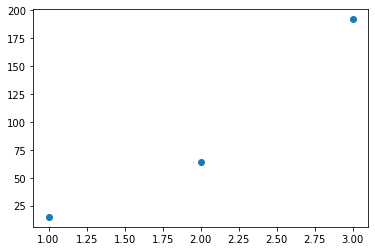

In [268]:
plt.scatter([1,2,3],[X1,X2,X3])
plt.show()

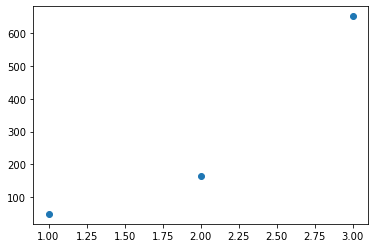

In [269]:
plt.scatter([1,2,3],[Y1,Y2,Y3])
plt.show()

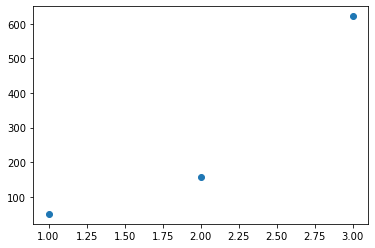

In [270]:
plt.scatter([1,2,3],[Z1,Z2,Z3])
plt.show()

In [271]:
from scipy import stats

In [272]:
days_list = [1,2,3]

In [282]:
stats.linregress(days_list,[X1,X2,X3])

LinregressResult(slope=88.5953604662028, intercept=-86.89379109328013, rvalue=0.9682185436451567, pvalue=0.16093073263971194, stderr=22.885538725977867, intercept_stderr=49.43841407547798)

In [284]:
np.polyfit(days_list,[X1,X2,X3],2)

array([ 39.63891583, -69.96030286,  45.23592835])

In [294]:
_,intercept = np.polyfit(days_list,np.log([Z1,Z2,Z3]),1)
print(np.exp(intercept))

13.926696102053203


In [307]:
def exp_fit(uncertainty_list):
    days_list = [1,2,3]
    _,intercept = np.polyfit(days_list,np.log(uncertainty_list),1)
    return np.exp(intercept)

In [310]:
_,intercept = np.polyfit(days_list,[X1,X2,X3],1)

In [311]:
intercept

-86.89379109328006

In [308]:
exp_fit([X1,X2,X3])

4.4077968264432

In [156]:
def max_conf_day(error_list):
    return np.percentile(error_list,95,method='closest_observation')

In [166]:
def compare_eph(ephem_list, year, month, day, length, prov1, prov2):
    n_year = year
    n_month = month
    n_day = day
    
    prov1_unc_I = []
    prov2_unc_I = []
    prov1_unc_X = []
    prov2_unc_X = []
    prov1_unc_Y = []
    prov2_unc_Y = []
    prov1_unc_Z = []
    prov2_unc_Z = []
    for i in range(length):
        prov1_eph_obj = find_ephem(ephem_list,n_year,n_month,n_day,prov1)
        prov2_eph_obj = find_ephem(ephem_list,n_year,n_month,n_day,prov2)
        epoch_unix = calculate_epoch_unix(n_year,n_month,n_day)
        
        dX1,dY1,dZ1,dR1,dI1,dC1,dX2,dY2,dZ2,dR2,dI2,dC2 = prov_mean_diff(prov1_eph_obj.ephem, prov2_eph_obj.ephem, epoch_unix)
        prov1_unc_I.append(max_conf_day(dI1))
        prov2_unc_I.append(max_conf_day(dI2))
        prov1_unc_X.append(max_conf_day(dX1))
        prov2_unc_X.append(max_conf_day(dX2))
        prov1_unc_Y.append(max_conf_day(dY1))
        prov2_unc_Y.append(max_conf_day(dY2))
        prov1_unc_Z.append(max_conf_day(dZ1))
        prov2_unc_Z.append(max_conf_day(dZ2))
        print("hts:",prov1_eph_obj.name)
        print("sgf:",prov2_eph_obj.name)
        #print("unix:",epoch_unix)
        
        
        n_year,n_month,n_day = next_day(n_year,n_month,n_day)
    return prov1_unc_I, prov2_unc_I, prov1_unc_X, prov2_unc_X, prov1_unc_Y, prov2_unc_Y, prov1_unc_Z, prov2_unc_Z

In [168]:
hts_uncI,sgf_uncI, hts_uncX, sgf_uncX, hts_uncY, sgf_uncY, hts_uncZ, sgf_uncZ = compare_eph(ephemerides,2022,4,5,30,"hts","sgf")

hts: larets_cpf_220405_5951.hts
sgf: larets_cpf_220405_09501.sgf
hts: larets_cpf_220406_5961.hts
sgf: larets_cpf_220406_09601.sgf
hts: larets_cpf_220407_09701.hts
sgf: larets_cpf_220407_09701.sgf
hts: larets_cpf_220408_09801.hts
sgf: larets_cpf_220408_09801.sgf
hts: larets_cpf_220409_09901.hts
sgf: larets_cpf_220409_09901.sgf
hts: larets_cpf_220410_10001.hts
sgf: larets_cpf_220410_10001.sgf
hts: larets_cpf_220411_10101.hts
sgf: larets_cpf_220411_10101.sgf
hts: larets_cpf_220412_10201.hts
sgf: larets_cpf_220412_10201.sgf
hts: larets_cpf_220413_10301.hts
sgf: larets_cpf_220413_10301.sgf
hts: larets_cpf_220414_10401.hts
sgf: larets_cpf_220414_10401.sgf
hts: larets_cpf_220415_10501.hts
sgf: larets_cpf_220415_10501.sgf
hts: larets_cpf_220416_10601.hts
sgf: larets_cpf_220416_10601.sgf
hts: larets_cpf_220417_10701.hts
sgf: larets_cpf_220417_10701.sgf
hts: larets_cpf_220418_10801.hts
sgf: larets_cpf_220418_10801.sgf
hts: larets_cpf_220419_10901.hts
sgf: larets_cpf_220419_10901.sgf
hts: larets_

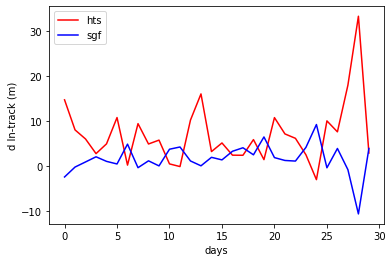

In [169]:
plt.plot([x for x in range(len(hts_uncI))], [x for x in hts_uncI],"r",label="hts")
plt.plot([x for x in range(len(sgf_uncI))], [x for x in sgf_uncI],"b",label="sgf")
plt.xlabel("days")
plt.ylabel("d In-track (m)")
plt.legend()
plt.show()

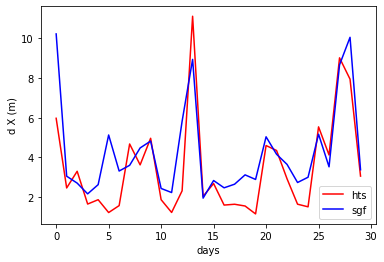

In [170]:
plt.plot([x for x in range(len(hts_uncX))], [x for x in hts_uncX],"r",label="hts")
plt.plot([x for x in range(len(sgf_uncX))], [x for x in sgf_uncX],"b",label="sgf")
plt.xlabel("days")
plt.ylabel("d X (m)")
plt.legend()
plt.show()

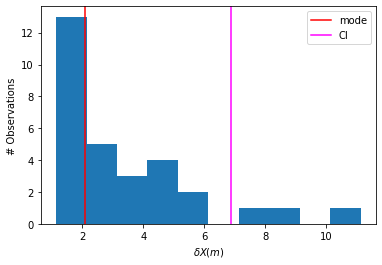

In [385]:
data = hts_uncX
distribution = scipy.stats.gaussian_kde(data)
md = calc_shgo_mode(data,distribution)
plt.hist(data)
plt.axvline(x=md,color='r',label="mode")
plt.axvline(x=md + 1.96*statistics.pstdev(data),color="magenta",label="CI")
plt.legend()
plt.xlabel(r"$\delta X (m)$")
plt.ylabel("# Observations")
plt.show()

In [358]:
import scipy.stats
import scipy.optimize

In [359]:
def calc_shgo_mode(data, distribution):
    def objective(x):
        return 1/distribution.pdf(x)[0]
    
    bnds = [[min(data), max(data)]]
    solution = scipy.optimize.shgo(objective, bounds= bnds, n=100*len(data))
    return solution.x[0]

In [366]:
distribution = scipy.stats.gaussian_kde(hts_uncZ)

In [367]:
calc_shgo_mode(hts_uncZ,distribution)

3.45013588571242

In [356]:
statistics.mode(hts_uncX)

5.9703639331273735

In [357]:
hts_uncX

[5.9703639331273735,
 2.4530427707359195,
 3.294824871001765,
 1.6406763489358127,
 1.859391629928723,
 1.2116003795526922,
 1.5619638266507536,
 4.673031171783805,
 3.618805810343474,
 4.961161616491154,
 1.8603085284121335,
 1.2156044833827764,
 2.3089695549570024,
 11.122724738204852,
 2.031579759437591,
 2.676459365990013,
 1.5889506824314594,
 1.6300604103598744,
 1.5414264523424208,
 1.1421665092930198,
 4.595543816918507,
 4.343879543012008,
 2.912334111519158,
 1.6329866382293403,
 1.5004610440228134,
 5.537230791756883,
 4.118736020987853,
 9.022461325163022,
 7.946686901152134,
 3.050334702944383]

In [81]:
def calculate_epoch_unix(year,month,day):
    epoch_dt = datetime(year,month,day)
    epoch_unix = (epoch_dt-datetime(1970, 1, 1, 0, 0, 0)).total_seconds()
    return epoch_unix

In [82]:
calculate_epoch_unix(2022,4,28)

1651104000.0

In [129]:
statistics.mean(hts_uncI)*np.sqrt(len(hts_uncI))

14.75106396366391

In [100]:
statistics.mean(sgf_uncI)

2.693163493369297

In [182]:
def error(days_errors):
    return abs(statistics.mean(days_errors))+1.96*(statistics.pstdev(days_errors)*np.sqrt(len(days_errors))) 

In [183]:
error(hts_uncZ)

58.708904225411914

In [184]:
statistics.pstdev(hts_uncZ)

5.035213140890208

In [185]:
statistics.pstdev(hts_uncZ)*np.sqrt(len(hts_uncZ))

27.57899819112005

In [186]:
def x_min_mu(distr_list):
    X_minus_mu = [np.sqrt(len(distr_list))*(x-np.mean(distr_list)) for x in distr_list]
    return statistics.pstdev(X_minus_mu)

In [187]:
x_min_mu(hts_uncZ)

27.57899819112005

In [195]:
np.mean(sgf_uncX)

4.2231160529952225

In [198]:
np.mean(sgf_uncZ) + 1.96*statistics.pstdev(sgf_uncZ)

15.428565662245642

In [201]:
hts_uncX_f = error(hts_uncX)
hts_uncY_f = error(hts_uncY)
hts_uncZ_f = error(hts_uncZ)

In [227]:
"""Takes epoch date and gives the looks as many days back to find the base date."""
def base_date(epoch,num_days):
    ep_year = epoch[0]
    ep_month = epoch[1]
    ep_day = epoch[2]
    
    for i in range(num_days):
        ep_year,ep_month,ep_day = previous_day(ep_year,ep_month,ep_day)
    
    return ep_year,ep_month,ep_day

In [225]:
"""Takes an epoch and returns the previous day. No leap years."""
def previous_day(year,month,day):
    day_list = [int(i) for i in np.linspace(1,31,31)]
    month_list = [int(i) for i in np.linspace(1,12,12)]
    
    if day == 1:
        prev_month = np.roll(month_list,+1)[month-1]
    else:
        prev_month = month
    
    if prev_month in [1,3,5,7,8,11,12]:
        dlist = day_list
    if prev_month == 2:
        dlist = day_list[0:28]
    if prev_month in [4,6,9,10]:
        dlist = day_list[0:30]
    
        
    prev_day = np.roll(dlist,+1)[day-1]
    prev_year = year
    
        
    if (day == 1 and month == 1):
        prev_year = year - 1
    else:
        prev_year = year
    
    return prev_year, prev_month, prev_day

In [226]:
previous_day(2022,1,1)

(2021, 12, 31)

In [230]:
base_date([2022,4,18],18)

(2022, 3, 31)

In [306]:
tr.id_data("L3226")

{'leolabs_id': 'L3226', 'norad_id': 33105, 'object_name': 'JASON 2'}

In [315]:
import random

In [316]:
toy_list = [1,2,3,4,5,6,7]

In [320]:
random.choices(toy_list,k=3)

[7, 2, 6]

In [321]:
toy_list.extend(random.choices(toy_list,k=3))

In [322]:
toy_list

[1, 2, 3, 4, 5, 6, 7, 2, 7, 4]

In [323]:
tl1 = [1,2,3]
tl2 = [1,2,3,4]
tl3 = [1,2,3,4,5]

In [329]:
def length(l):
    return len(l)

In [330]:
tlist = [tl2,tl1,tl3]

In [336]:
stlist = tlist.sort(reverse=True,key=length)

In [337]:
tlist

[[1, 2, 3, 4, 5], [1, 2, 3, 4], [1, 2, 3]]

In [338]:
len(tlist[0])

5

In [345]:
def list_bootstraping(l,maxlen):
    return l.extend(random.choices(l,k=maxlen-len(l)))

In [347]:
BSL = list_bootstraping(tl1,5)

In [384]:
tl1

[1, 2, 3, 1, 2]